# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [2]:
## Data loading
data_name = 'aapl'
seq_len = 25

if data_name in ['stock', 'energy', 'aapl']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

# data has following shape: (3661, 21, 6) = (no_samples - seq_len, seq_len, no_features (Close, Open,High,Low,Adj_Close,Volume)
# REMEMBER: Data was reordered, which means that the most recent values are up first

ori data shape: (10978, 6)
aapl dataset is ready.


## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [5]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [6]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation, Saving generated data...')

### Save Data
generated_data = np.array(generated_data)
print(f'first element of generated data: {generated_data[0]}')

no, seq_length, dim = generated_data.shape
data_to_save = generated_data.reshape(no, seq_length*dim)

np.savetxt(f'data_{no}_{seq_length}_{dim}.csv', data_to_save, delimiter=',')
print('Data saved successfully!')


### Load Data
loaded_generated_data = np.loadtxt(f'data_{no}_{seq_length}_{dim}.csv', delimiter=',')
loaded_generated_data = loaded_generated_data.reshape(no, seq_length, dim)

print(f'First element of generated data after loading: {loaded_generated_data[0]}')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2024-07-03 17:30:08.098510: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-07-03 17:30:08.227674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:63:00.0
2024-07-03 17:30:08.231094: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:66:00.0
2024-07-03 17:30:08.234583: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:3e:00.0
2024-07-03 17:30:08.238016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:40:00.0
2

2024-07-03 17:30:09.598296: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561b568dbad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-03 17:30:09.598362: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA TITAN RTX, Compute Capability 7.5
2024-07-03 17:30:09.598379: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA TITAN RTX, Compute Capability 7.5
2024-07-03 17:30:09.598391: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-07-03 17:30:09.598402: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-07-03 17:30:09.598413: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (4): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-07-03 17:30:09.607338: I tensorf

Start Embedding Network Training


2024-07-03 17:30:14.883530: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0


step: 0/10000, e_loss: 0.4494
step: 1000/10000, e_loss: 0.0163
step: 2000/10000, e_loss: 0.0116
step: 3000/10000, e_loss: 0.0149
step: 4000/10000, e_loss: 0.0325
step: 5000/10000, e_loss: 0.0076
step: 6000/10000, e_loss: 0.0067
step: 7000/10000, e_loss: 0.0057
step: 8000/10000, e_loss: 0.0058
step: 9000/10000, e_loss: 0.0043
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.3264
step: 1000/10000, s_loss: 0.0232
step: 2000/10000, s_loss: 0.0183
step: 3000/10000, s_loss: 0.0171
step: 4000/10000, s_loss: 0.0168
step: 5000/10000, s_loss: 0.0166
step: 6000/10000, s_loss: 0.0164
step: 7000/10000, s_loss: 0.0161
step: 8000/10000, s_loss: 0.0153
step: 9000/10000, s_loss: 0.016
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.1204, g_loss_u: 0.684, g_loss_s: 0.0267, g_loss_v: 0.1665, e_loss_t0: 0.0094
step: 1000/10000, d_loss: 1.7816, g_loss_u: 1.2493, g_loss_s: 0.0226, g_loss_v: 0.0195, e_loss_t0: 0.0043
s

In [7]:
loaded_generated_data.shape, generated_data.shape, np.array(ori_data).shape

((10953, 25, 6), (10953, 25, 6), (10953, 25, 6))

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [8]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.


2024-07-03 20:48:54.947339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:63:00.0
2024-07-03 20:48:54.950811: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:66:00.0
2024-07-03 20:48:54.954348: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:3e:00.0
2024-07-03 20:48:54.959606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:40:00.0
2024-07-03 20:48:54.963166: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 4 with properties: 
name: NVIDIA GeForce RTX

Discriminative score: 0.1226


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [9]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

2024-07-03 20:56:33.275080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:63:00.0
2024-07-03 20:56:33.278232: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 1 with properties: 
name: NVIDIA TITAN RTX major: 7 minor: 5 memoryClockRate(GHz): 1.77
pciBusID: 0000:66:00.0
2024-07-03 20:56:33.281793: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 2 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:3e:00.0
2024-07-03 20:56:33.284911: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 3 with properties: 
name: NVIDIA GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.545
pciBusID: 0000:40:00.0
2024-07-03 20:56:33.288621: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 4 with properties: 
name: NVIDIA GeForce RTX

Predictive score: 0.0272


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

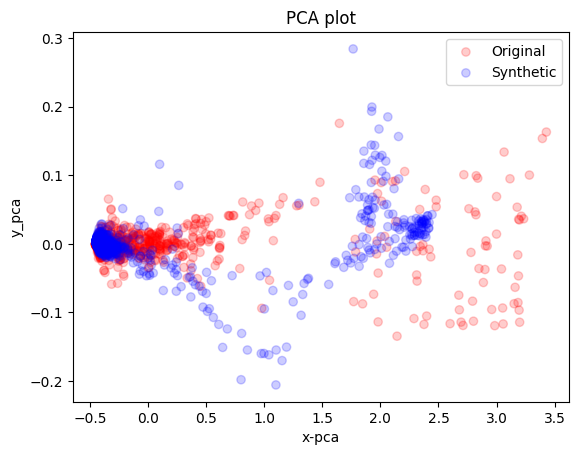

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.004208
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.162411
[t-SNE] KL divergence after 300 iterations: 0.870164


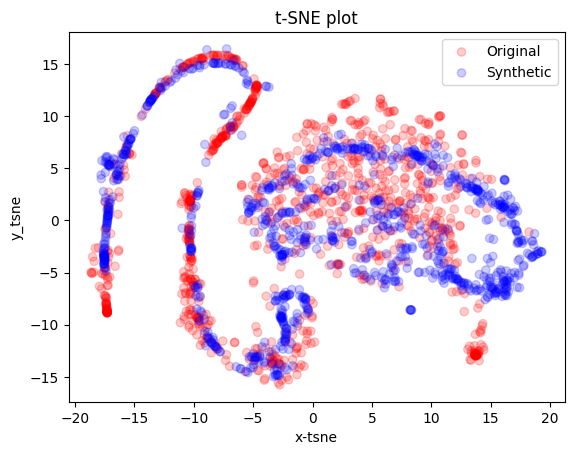

In [10]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')